Варіант 31 Виконав: Стаськів М.А. КН-414

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [ ]:
from scipy.stats import bartlett

In [ ]:
from scipy.stats import f_oneway

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/MatStat1/lab1/population-past-future.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Entity,Code,Year,Population (historical estimates and future projections)
0,Afghanistan,AFG,-10000,14737
1,Afghanistan,AFG,-9000,20405
2,Afghanistan,AFG,-8000,28253
3,Afghanistan,AFG,-7000,39120
4,Afghanistan,AFG,-6000,54166
...,...,...,...,...
74769,Zimbabwe,ZWE,2096,30940779
74770,Zimbabwe,ZWE,2097,30952208
74771,Zimbabwe,ZWE,2098,30959811
74772,Zimbabwe,ZWE,2099,30964052


In [ ]:
labels = ['Ethiopia', 'Ecuador', 'El Salvador', 'Eritrea', 'Equatorial Guinea','Estonia']


In [ ]:
df = df[(df['Year'] > 1960) & (df['Year'] < 2022)]
df.reset_index(inplace=True)
df

,index,Entity,Code,Year,Population (historical estimates and future projections)
0,198,Afghanistan,AFG,1961,9169406
1,199,Afghanistan,AFG,1962,9351442
2,200,Afghanistan,AFG,1963,9543200
3,201,Afghanistan,AFG,1964,9744772
4,202,Afghanistan,AFG,1965,9956318
...,...,...,...,...,...
14799,74690,Zimbabwe,ZWE,2017,14236599
14800,74691,Zimbabwe,ZWE,2018,14438812
14801,74692,Zimbabwe,ZWE,2019,14645473
14802,74693,Zimbabwe,ZWE,2020,14862927


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
lambdas = np.linspace(-3,3,13)
lambdas

array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
        2.5,  3. ])

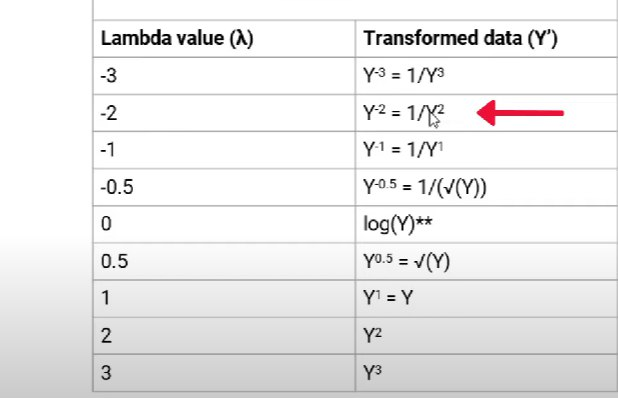

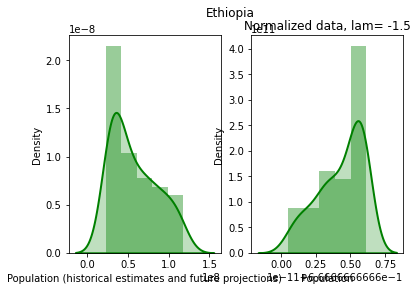

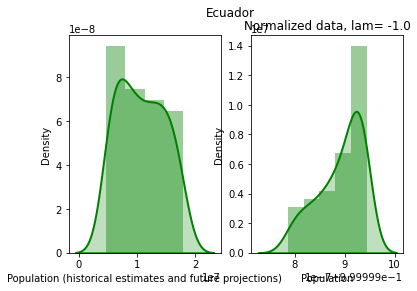

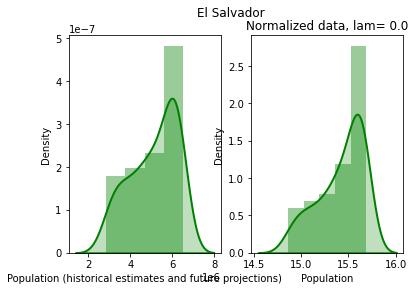

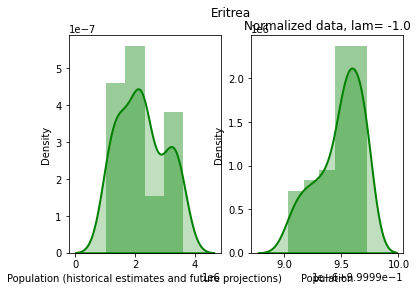

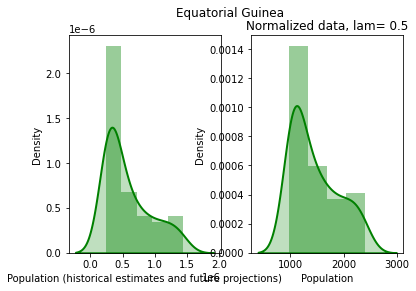

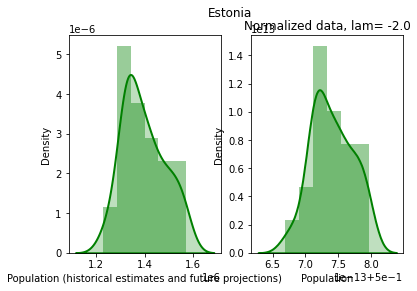

In [ ]:
result_box = []
for label in labels:
  data = df[df['Entity'] == label]

  fig, ax = plt.subplots(1, 2)
  fig.suptitle(label)
  
  sns.distplot(data['Population (historical estimates and future projections)'], hist = True, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Non-Normal", color ="green", ax = ax[0])
  
  lam = -10
  best_res = -10
  
  for L in lambdas:
        fitted_data = stats.boxcox(data['Population (historical estimates and future projections)'], lmbda=L)
        if( stats.normaltest(fitted_data).pvalue > best_res):
          best_res = stats.normaltest(fitted_data).pvalue
          best_data = fitted_data
          lam = L
  
  sns.distplot(best_data, hist = True, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Normal", color ="green", ax = ax[1])
  ax[1].title.set_text('Normalized data, lam= '+str(lam))
  ax[1].set_xlabel('Population')
  
  result_box.append(best_data)


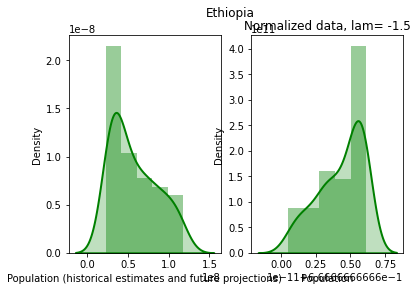

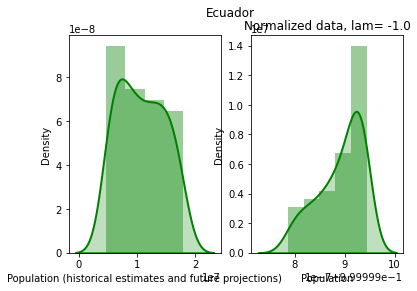

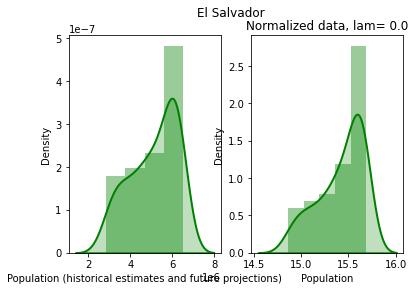

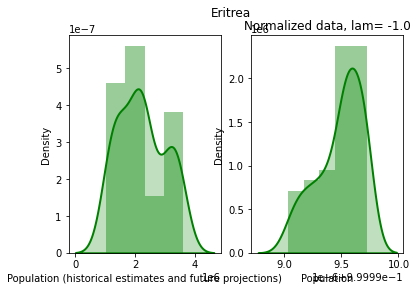

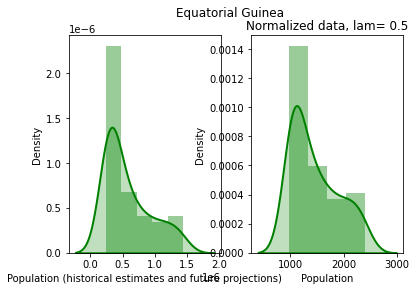

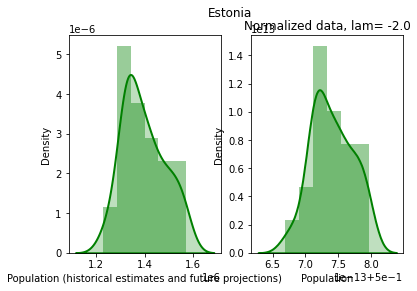

In [ ]:
result_john = []
best_lam = []
for label in labels:

  data = pd.DataFrame(df[df['Entity'] == label])

  lam = -10
  best_res = -10

  for L in lambdas:
    fitted_data = stats.yeojohnson(data['Population (historical estimates and future projections)'], lmbda = L)
    if( stats.normaltest(fitted_data).pvalue > best_res):
          best_res = stats.normaltest(fitted_data).pvalue
          best_data = fitted_data
          lam = L

  fig, ax = plt.subplots(1, 2)
  fig.suptitle(label)

  sns.distplot(data['Population (historical estimates and future projections)'], hist = True, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Non-Normal", color ="green", ax = ax[0])
  
  sns.distplot(best_data, hist = True, kde = True,
              kde_kws = {'shade': True, 'linewidth': 2},
              label = "Normal", color ="green", ax = ax[1])
  ax[1].title.set_text('Normalized data, lam= '+str(lam))
  ax[1].set_xlabel('Population')
  
  result_john.append(best_data)

In [ ]:
for i in range(0, len(labels)):
  print(stats.normaltest(result_box[i]))

NormaltestResult(statistic=6.925319087507814, pvalue=0.03134628424670247)
NormaltestResult(statistic=6.854645571457839, pvalue=0.03247376372290286)
NormaltestResult(statistic=7.26782608195749, pvalue=0.026412628234615678)
NormaltestResult(statistic=6.399296998800224, pvalue=0.040776534435952014)
NormaltestResult(statistic=8.363420135779727, pvalue=0.015272368436386512)
NormaltestResult(statistic=2.3688482557820736, pvalue=0.305922300902742)


In [ ]:
for i in range(0, len(labels)):
  print(stats.normaltest(result_john[i]))

NormaltestResult(statistic=6.925319087507814, pvalue=0.03134628424670247)
NormaltestResult(statistic=6.854645237520558, pvalue=0.03247376914500348)
NormaltestResult(statistic=7.267825902061709, pvalue=0.026412630610375982)
NormaltestResult(statistic=6.399294575584655, pvalue=0.04077658384114851)
NormaltestResult(statistic=8.363416406625776, pvalue=0.015272396912919617)
NormaltestResult(statistic=2.3688482557820736, pvalue=0.305922300902742)


In [ ]:
transf_data = []
for i in range(0, len(labels)):
    if (stats.normaltest(result_box[i]).pvalue>stats.normaltest(result_john[i]).pvalue):
       transf_data.append(result_box[i])
    else:
       transf_data.append(result_john[i])

In [ ]:
#transf_data

In [ ]:
buf = 0
yy = 0
for i in labels:
  if len(i) > buf:
    buf = len(i)
    res = i
print(res)
for i in labels:
  yy+=1
  if i == res:
    break
print(yy)

Equatorial Guinea
5


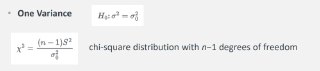

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]
# np.absolute(flatten(transf_data))

In [ ]:
MAX = max(flatten(transf_data))
MIN = min(flatten(transf_data))

In [ ]:
stats.ttest_1samp(transf_data[yy-1], ((MAX - MIN) / 2))

Ttest_1sampResult(statistic=4.411495376779422, pvalue=4.334612343646309e-05)

In [ ]:
arr = transf_data[yy-1]

X2 = ( ((len(arr)-1)*arr.std()*arr.std()) / 3100*3100)
X2

11528219.659316784

In [ ]:
Q = np.quantile(arr, 0.95)
Q

2286.2019141675414

In [ ]:
assert X2 < Q

AssertionError: ignored

In [ ]:
import scipy.stats

In [ ]:
first_name = transf_data[0]
last_name = transf_data[-1]

In [ ]:
stats.ttest_ind(first_name, last_name)

Ttest_indResult(statistic=786779234109.8391, pvalue=0.0)

In [ ]:
ETHIOPIA = transf_data[0]
ERITREA = transf_data[3]

In [ ]:
stat, p = bartlett(ETHIOPIA, ERITREA)

In [ ]:
print(stat, p)

1308.5821606571253 1.5424197179236994e-286


In [ ]:
group_one, group_two = [], []
for i in labels:
  if len(i)% 2 == 0:
    group_one.append(i)
  else:
    group_two.append(i)
  

In [ ]:
group_one, group_two

(['Ethiopia'],
 ['Ecuador', 'El Salvador', 'Eritrea', 'Equatorial Guinea', 'Estonia'])

In [ ]:
from random import sample

In [ ]:
group_two_uni = []
for i in range(1, len(transf_data)):
  group_two_uni.append(transf_data[i])
group_two_uni = flatten(group_two_uni)
group_two_uni = sample(group_two_uni, len(transf_data[0]))

In [ ]:
stats.ttest_ind(transf_data[0],  group_two_uni)

Ttest_indResult(statistic=-2.7103994354807033, pvalue=0.007705489261686836)

In [ ]:
buf = 1000
yy = 0
for i in labels:
  if len(i) < buf:
    buf = len(i)
    res = i
print(res)
for i in labels:
  yy+=1
  if i == res:
    break
print(yy)

Ecuador
2


In [ ]:
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p

In [ ]:
f_test(transf_data[yy-1], transf_data[1])

(1.0, 0.5000000000000002)

In [ ]:
a, b, c, d, e, f = transf_data

In [ ]:
stat, p = bartlett(a, b, c, d, e, f)

In [ ]:
print(stat, p)

13957.395791040533 0.0


In [ ]:
F, p2 = f_oneway(a, b, c, d, e, f)

In [ ]:
print(F, p2)

655.5301345876729 2.4152345086323132e-178


In [ ]:
years = np.array(range(1960,2021))


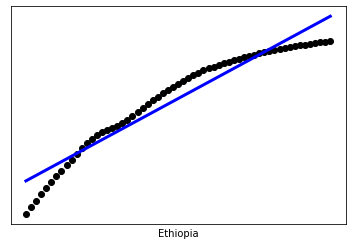

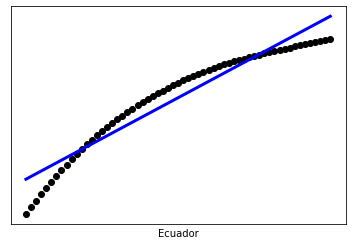

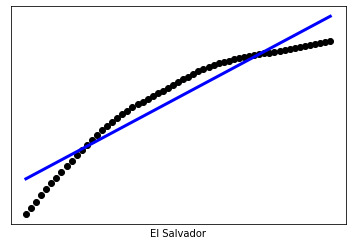

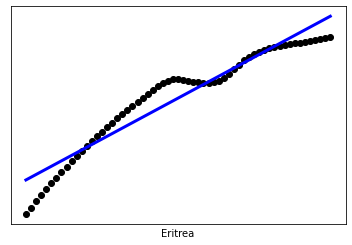

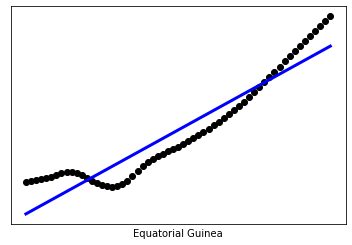

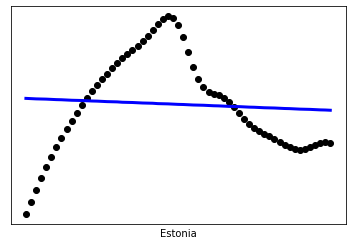

In [ ]:
for i in range(0, len(labels)):
  x = years
  y = transf_data[i]
  x = x.reshape(-1,1)
  y = y.reshape(-1,1)
  regr = linear_model.LinearRegression()
  regr.fit(x, y)
  plt.scatter(x, y,  color='black')
  plt.plot(x, regr.predict(x), color='blue', linewidth=3)
  plt.xlabel(labels[i])
  plt.xticks(())
  plt.yticks(())
  plt.show()